## Importing Libraries

import numpy as np

import pandas as pd

from scipy.stats import pearsonr, chi2_contingency

import matplotlib.pyplot as plt

import seaborn as sns

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

## Assigning a Name

nba = pd.read_csv("nba_games.csv")

In [4]:
nba = pd.read_csv("nba_games.csv")

In [5]:
print(nba.head())

        game_id  year_id  fran_id  ... game_result  forecast  point_diff
0  194611010TRH     1947   Knicks  ...           W  0.359935           2
1  194611020CHS     1947   Knicks  ...           L  0.368899         -16
2  194611020PRO     1947  Celtics  ...           L  0.359935          -6
3  194611050BOS     1947  Celtics  ...           L  0.620204          -2
4  194611070STB     1947   Knicks  ...           W  0.339290           5

[5 rows x 11 columns]


## Print Informations

print(nba.info())

In [7]:
print(nba.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24359 entries, 0 to 24358
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        24359 non-null  object 
 1   year_id        24359 non-null  int64  
 2   fran_id        24359 non-null  object 
 3   opp_fran       24359 non-null  object 
 4   game_location  24359 non-null  object 
 5   is_playoffs    24359 non-null  int64  
 6   pts            24359 non-null  int64  
 7   opp_pts        24359 non-null  int64  
 8   game_result    24359 non-null  object 
 9   forecast       24359 non-null  float64
 10  point_diff     24359 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB
None


## Analyzing relationships between Quant and Categorical

## Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]

nba_2014 = nba[nba.year_id == 2014]

print(nba_2010.head())

print(nba_2014.head())

In [8]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

In [9]:
print(nba_2010.head())
print(nba_2014.head())

            game_id  year_id  fran_id  ... game_result  forecast  point_diff
21717  200910270CLE     2010  Celtics  ...           W  0.277472           6
21718  200910280BOS     2010  Celtics  ...           W  0.814619          33
21719  200910280MIA     2010   Knicks  ...           L  0.258755         -22
21720  200910280MIN     2010     Nets  ...           L  0.475155          -2
21721  200910280OKC     2010  Thunder  ...           W  0.716764          13

[5 rows x 11 columns]
            game_id  year_id  fran_id  ... game_result  forecast  point_diff
23468  201310300CLE     2014     Nets  ...           L  0.611981          -4
23469  201310300NYK     2014   Knicks  ...           W  0.793150           7
23470  201310300SAS     2014    Spurs  ...           W  0.692980           7
23471  201310300TOR     2014  Celtics  ...           L  0.361233          -6
23472  201310300UTA     2014  Thunder  ...           W  0.526056           3

[5 rows x 11 columns]


## Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts_10 (fran_id = "Knicks") and nets_pts_10(fran_id = "Nets") that represent the points each team has scored in their games.

knicks_pts_10 = nba_2010.pts[nba.fran_id == "Knicks"]

nets_pts_10 =  nba_2010.pts[nba.fran_id == "Nets"]

print(knicks_pts_10.head())

print(nets_pts_10.head())

In [22]:
knicks_pts_10 = nba_2010.pts[nba.fran_id == "Knicks"]
nets_pts_10 =  nba_2010.pts[nba.fran_id == "Nets"]

In [23]:
print(knicks_pts_10.head())
print(nets_pts_10.head())

21719     93
21725    100
21728    127
21734    117
21739     89
Name: pts, dtype: int64
21720     93
21727     85
21730    104
21733     68
21738     94
Name: pts, dtype: int64


## Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. Based on this value, do you think fran_id and pts are associated? Why or why **not?

knicks_pts_10_mean = knicks_pts_10.mean()

nets_pts_10_mean = nets_pts_10.mean()

diff_means_2010 =  nets_pts_10_mean - knicks_pts_10_mean 

print(diff_means_2010)

In [24]:
knicks_pts_10_mean = knicks_pts_10.mean()
nets_pts_10_mean = nets_pts_10.mean()

In [30]:
diff_means_2010 =  nets_pts_10_mean - knicks_pts_10_mean 

In [31]:
print(diff_means_2010)

-9.731707317073173


## Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?

plt.hist(knicks_pts_10, color='blue', label='Knicks', density=True, alpha=0.5)

plt.hist(nets_pts_10, color='red', label='Nets', density=True, alpha=0.5)

plt.legend()

plt.show()

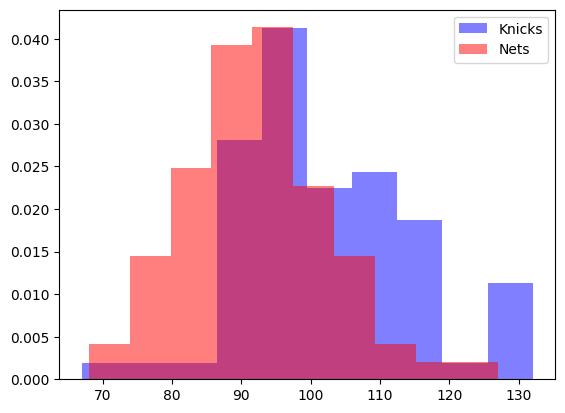

In [32]:
plt.hist(knicks_pts_10, color='blue', label='Knicks', density=True, alpha=0.5)
plt.hist(nets_pts_10, color='red', label='Nets', density=True, alpha=0.5)
plt.legend()
plt.show()

## Now, let’s compare the 2010 games to 2014. Replicate the steps from the previous three exercises using nba_2014. First, calculate the mean difference between the two teams points scored. Save and print the value as diff_means_2014. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?

knicks_pts_14 = nba_2014.pts[nba.fran_id == "Knicks"]

nets_pts_14 =  nba_2014.pts[nba.fran_id == "Nets"]

knicks_pts_14_mean = knicks_pts_14.mean()

nets_pts_14_mean = nets_pts_14.mean()

diff_means_2014 =  nets_pts_14_mean - knicks_pts_14_mean

print(diff_means_2014)

In [33]:
knicks_pts_14 = nba_2014.pts[nba.fran_id == "Knicks"]
nets_pts_14 =  nba_2014.pts[nba.fran_id == "Nets"]

In [34]:
knicks_pts_14_mean = knicks_pts_14.mean()
nets_pts_14_mean = nets_pts_14.mean()

In [35]:
diff_means_2014 =  nets_pts_14_mean - knicks_pts_14_mean 

In [36]:
print(diff_means_2014)

-0.44706798131809933


plt.hist(knicks_pts_14, color='blue', label='Knicks', density=True, alpha=0.5)

plt.hist(nets_pts_14, color='red', label='Nets', density=True, alpha=0.5)

plt.legend()

plt.show()

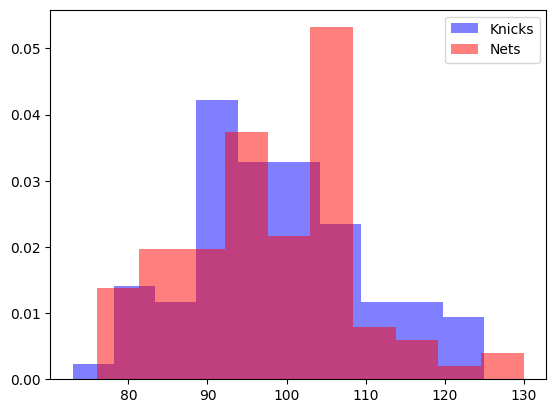

In [37]:
plt.hist(knicks_pts_14, color='blue', label='Knicks', density=True, alpha=0.5)
plt.hist(nets_pts_14, color='red', label='Nets', density=True, alpha=0.5)
plt.legend()
plt.show()

## For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game
## 
## Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?

nba_2010 = nba[nba.year_id == 2010]

sns.boxplot(data=nba_2010,x="fran_id",y="pts")

plt.show()

In [38]:
nba_2010 = nba[nba.year_id == 2010]

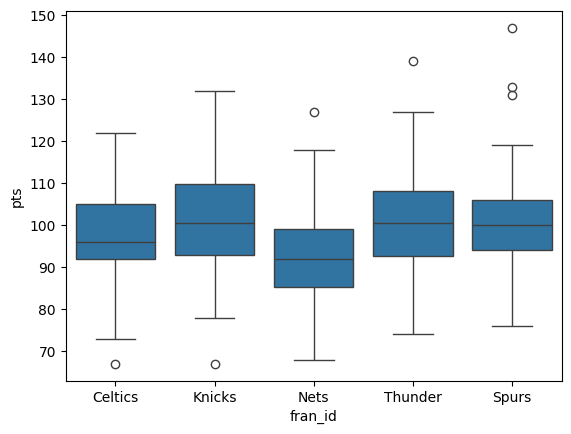

In [39]:
sns.boxplot(data=nba_2010,x="fran_id",y="pts")
plt.show()

## Analyzing relationships between Categorical variables

## We’d like to know if teams tend to win more games at home compared to away.
## 
## The variable game_result indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable game_location indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”)
## 
## Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.
## 
## Save your result as location_result_freq and print your result. Based on this table, do you think the variables are associated?

location_result_freq = pd.crosstab(nba.game_result,nba.game_location)

print(location_result_freq)

location_result_proportions = location_result / len(nba)

print(location_result_proportions)

location_result_proportions_L = location_result_proportions.sum(axis=0)

print(location_result_proportions_L)

location_result_proportions_W = location_result_proportions.sum(axis=1)

print(location_result_proportions_W)


In [42]:
location_result_freq = pd.crosstab(nba.game_result,nba.game_location)
print(location_result_freq)

game_location     A     H  N
game_result                 
L              7105  4298  3
W              5003  7942  8


In [43]:
location_result_proportions = location_result / len(nba)
print(location_result_proportions)

game_location         A         H         N
game_result                                
L              0.291679  0.176444  0.000123
W              0.205386  0.326040  0.000328


In [44]:
location_result_proportions_L = location_result_proportions.sum(axis=0)
print(location_result_proportions_L)

game_location
A    0.497065
H    0.502484
N    0.000452
dtype: float64


In [45]:
location_result_proportions_W = location_result_proportions.sum(axis=1)
print(location_result_proportions_W)

game_result
L    0.468246
W    0.531754
dtype: float64


## Using the contingency table we created in Task 6 (use the counts – NOT the proportions), calculate the expected contingency table (if there were no association) and the Chi-Square statistic and print your results. Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?

chi2, pval, dof, expected = chi2_contingency(location_result_proportions)

print(expected)

print(chi2)

In [49]:
chi2, pval, dof, expected = chi2_contingency(location_result_proportions)
print(expected)
print(chi2)

[[2.32748488e-01 2.35285885e-01 2.11449733e-04]
 [2.64316252e-01 2.67197797e-01 2.40128739e-04]]
0.0558022856011154


## Analyzing Relationships Between Quantitative Variables

## Using nba_2010, calculate the covariance between forecast (538’s projected win probability) and point_diff (the margin of victory/defeat) in the dataset. Call this point_diff_forecast_cov. Save and print your result. Looking at the matrix, what is the covariance between these two variables?

point_diff_forecast_cov = np.cov(nba_2010.forecast,nba_2010.point_diff)

print(point_diff_forecast_cov)

In [51]:
point_diff_forecast_cov = np.cov(nba_2010.forecast,nba_2010.point_diff)
print(point_diff_forecast_cov)

[[5.22668307e-02 1.37461257e+00]
 [1.37461257e+00 1.86559287e+02]]


## Using nba_2010, calculate the correlation between forecast and point_diff. Call this point_diff_forecast_corr. Save and print your result. Does this value suggest an association between the two variables?

point_diff_forecast_corr, p = pearsonr(nba_2010.forecast,nba_2010.point_diff)

print(point_diff_forecast_corr)

plt.scatter(x=nba_2010.forecast, y= nba_2010.point_diff)

plt.xlabel('Forecasted Win Prob.')

plt.ylabel('Point Differential')

plt.show()

In [52]:
point_diff_forecast_corr, p = pearsonr(nba_2010.forecast,nba_2010.point_diff)
print(point_diff_forecast_corr)

0.4402088708468081


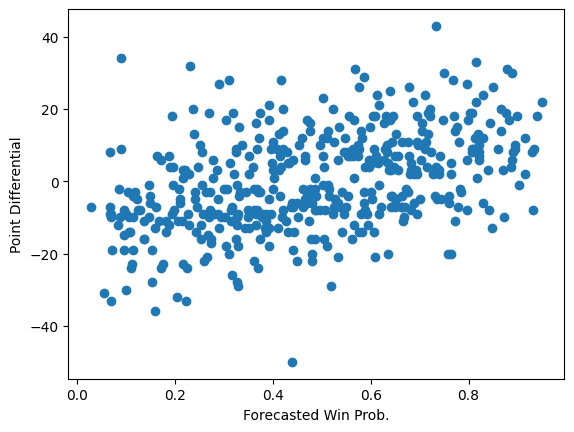

In [55]:
plt.scatter(x=nba_2010.forecast, y= nba_2010.point_diff)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()